**Visualização dos dados do Gapminder com scatter**

* Vinícius Almeida Bernardino de Souza - rm97888
* Jessica Witzler Costacurta - rm99068

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

exp_data = pd.read_csv('lex.csv')
fert_data = pd.read_csv('children_per_woman_total_fertility.csv')
gni_data = pd.read_csv('gdp_pcap.csv')
inf_mort_data = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')

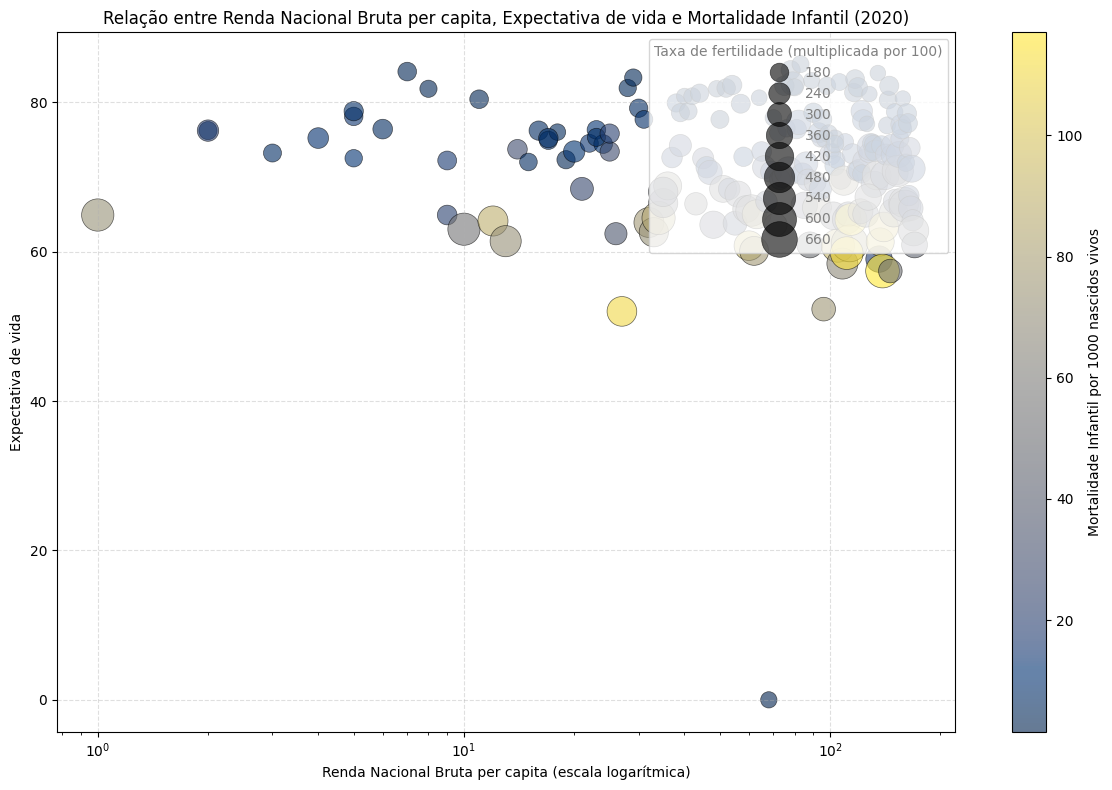

In [6]:
ano = '2020'
exp_2020 = exp_data[['country', ano]].rename(columns={ano: 'Expectativa de vida'})
fert_2020 = fert_data[['country', ano]].rename(columns={ano: 'Taxa de fertilidade'})
gni_2020 = gni_data[['country', ano]].rename(columns={ano: 'Renda Nacional Bruta per capita'})
inf_mort_2020 = inf_mort_data[['country', ano]].rename(columns={ano: 'Mortalidade Infantil'})


dados = exp_2020.merge(fert_2020, on='country').merge(gni_2020, on='country').merge(inf_mort_2020, on='country')
plt.figure(figsize=(12, 8))
scatter = plt.scatter(dados['Renda Nacional Bruta per capita'], dados['Expectativa de vida'],
                      s=dados['Taxa de fertilidade'] * 100, c=dados['Mortalidade Infantil'],
                      alpha=0.6, cmap='cividis', edgecolors='k', linewidth=0.5)
plt.xscale('log')
plt.xlabel('Renda Nacional Bruta per capita (escala logarítmica)')
plt.ylabel('Expectativa de vida')
plt.title('Relação entre Renda Nacional Bruta per capita, Expectativa de vida e Mortalidade Infantil (2020)')
plt.colorbar(scatter, label='Mortalidade Infantil por 1000 nascidos vivos')

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legenda = plt.legend(handles, labels, title="Taxa de fertilidade (multiplicada por 100)", loc='upper right')

plt.setp(legenda.get_texts(), color='grey')
plt.setp(legenda.get_title(), color='grey')

plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()